## 로지스틱 회귀 모델

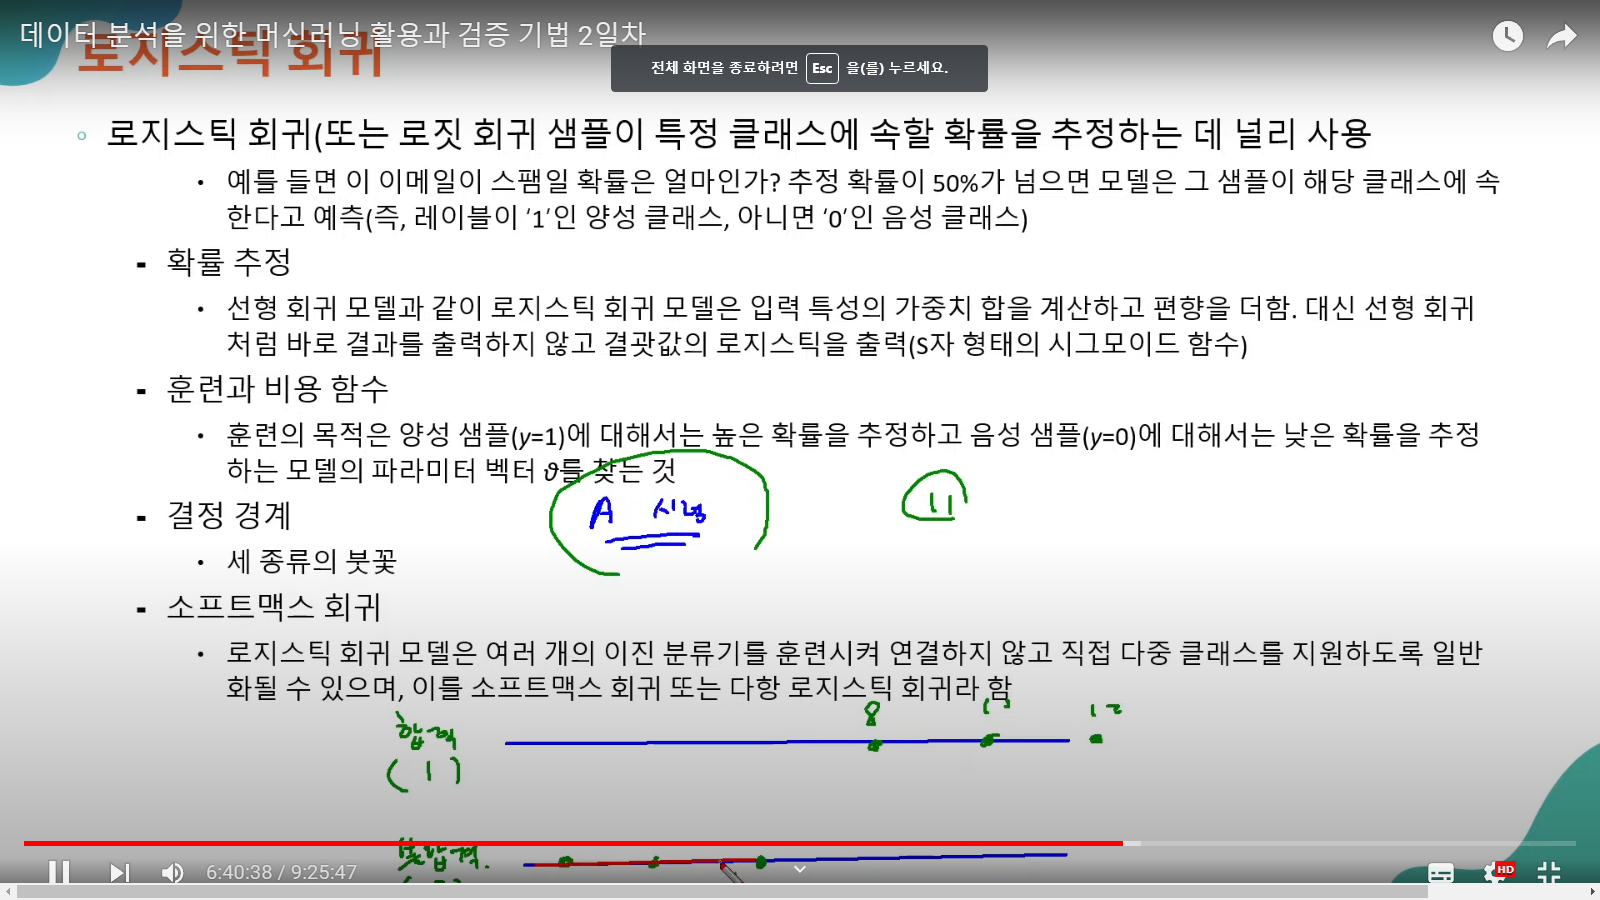

- sigmoid 함수가 이진 분류에 적합하므로 로지스틱 회귀모델로 채택
- sigmoid 의 파라미터 값이 변동에 따라 어떻게 바뀌는 지 확인해보자

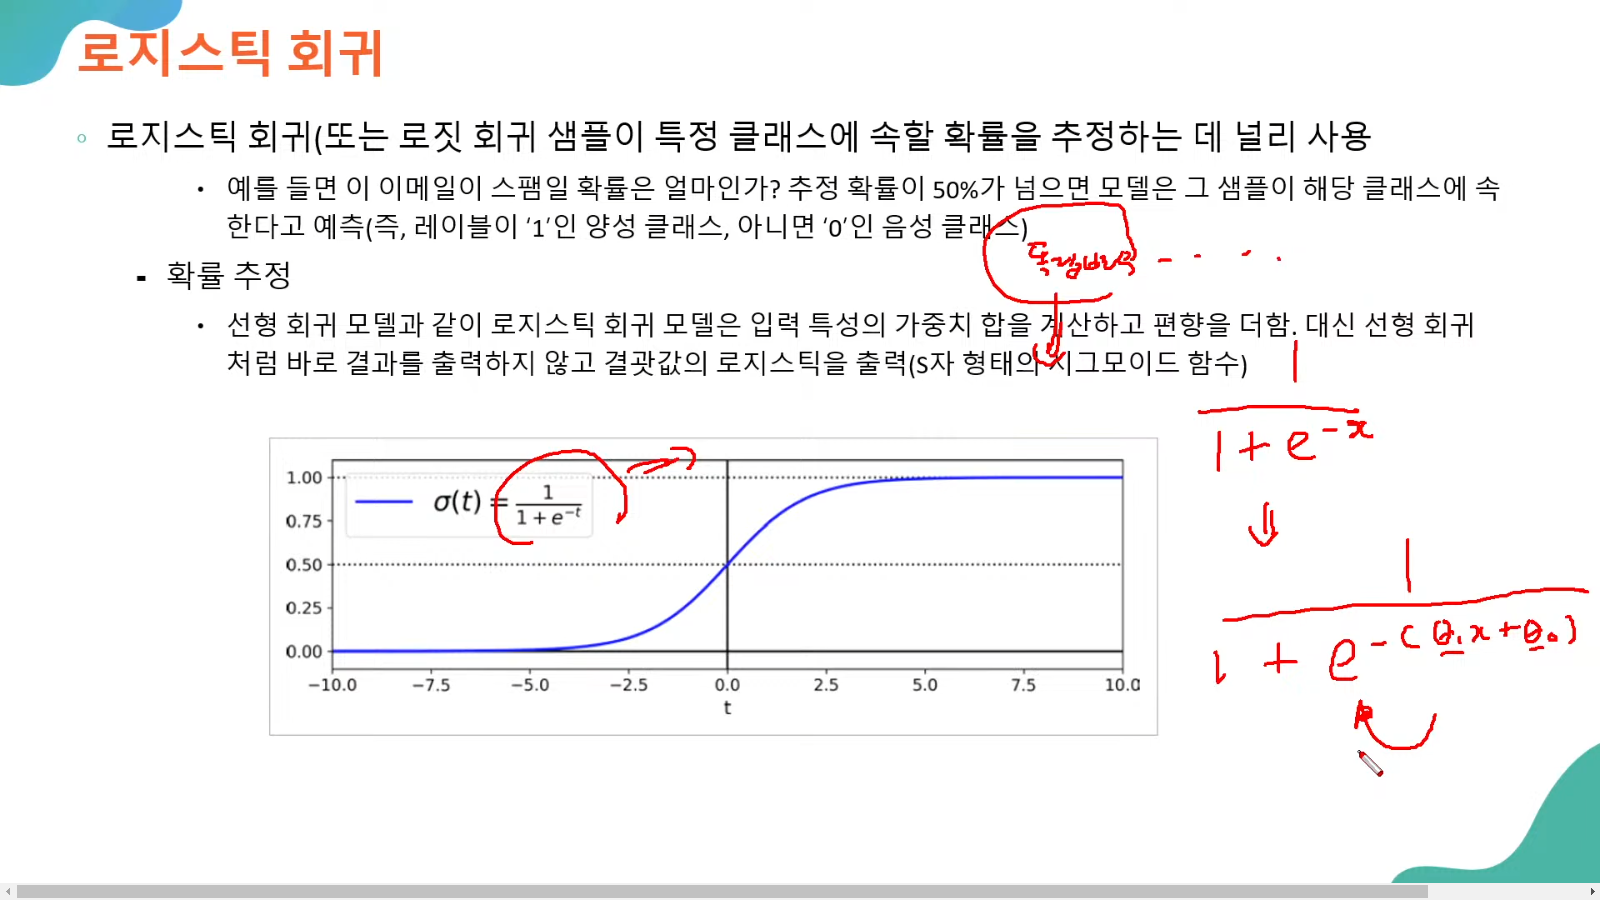

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

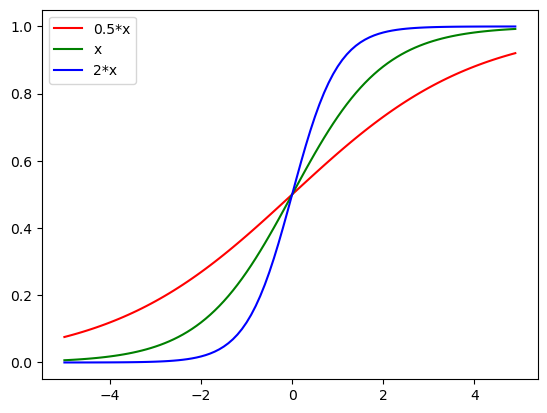

In [9]:
x = np.arange(-5, 5, 0.1)

y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', label='0.5*x')
plt.plot(x, y2, 'g', label='x')
plt.plot(x, y3, 'b', label='2*x')
plt.legend(loc='best')
plt.show() # 계수값이 커지면 step function에 가까워짐

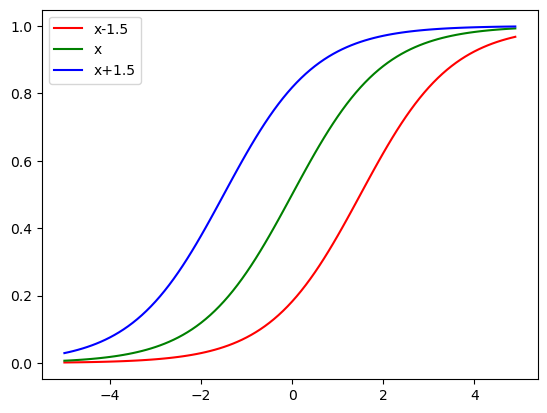

In [17]:
y1 = sigmoid(x - 1.5)
y2 = sigmoid(x)
y3 = sigmoid(x + 1.5)
plt.plot(x, y1, 'r', label='x-1.5')
plt.plot(x, y2, 'g', label='x')
plt.plot(x, y3, 'b', label='x+1.5')
plt.legend(loc='best')
plt.show() # 절편의 크기에 따라 좌우로 이동

## 로직스틱 회귀 모델의 손실함수
- 로지스틱 회귀에서 손실함수는 binary cross entropy를 사용(Gradient descent를 사용하려면 미분이 되어야 하므로)
- 데이터의 각 지점에서의 로지스틱 회귀 모델의 예측값이 정답과 맞을 때는 Loss가 0이 된다.(이상적인 경우임)
- 이걸 손실함수로 표현하기 위해 먼저, 정답이 1일때와 정답이 0일때로 나누어 생각해보자
### 1) 정답이 1일 때,
    - 로지스틱 모델의 예측값의 범위는 0~1인데, 이것은 정답일 확률을 나타낸다. (예측값이 1이면 그 정답일 확률이 100% 임을 의미함)
    - 정답이 1일 때 예측값이 1에 근접하다면 제대로 정답을 예측한 것이다.(이경우 예측값은 거의 1에 근사하게 나올 것이다)
    - Loss를 표현하기 위해 로지스틱 회귀 모델의 예측값에 log를 하게 되면, 예측값이 1에 가까울수록 Log1=0 으로 가까이 가게 된다.(손실이 0으로 된다는 의미)
    - 반대로, 정답이 1인데, 예측값이 0에 가까우면 잘못 예측한 것인데 log 함수의 특성상 0에 가까울 수록 무한대로 커지게 된다.
    - 손실함수를 이렇게 구성하면 손실이 최대한 작아지도록 학습할 것이고 이에 따라 최적의 파라미터값을 구하게 될 것이다.

 ### 2) 정답이 0일 때,
    - 위의 정답이 1일 때와 유사하다.
    - 다만, 정답이 0일 때, 예측값이 1로 나오면 잘못 예측한 것이므로 (1 - 예측값) 에 log를 적용하면 된다.
    - 즉, 예측값이 1이 나오면 잘못 예측한 것이므로 log 값은 무한대로 커지고(손실이 커지고)
    - 예측값이 0이 나오면 정답을 제대로 예측한 것이므로 log값이 0으로 가까워진다.
### 
- 이런식으로 손실함수를 구성한 것이 binary cross entropy 이다. (아래 참조)
- 로지스틱 회귀의 손실함수에 대해서 시각적으로 이해하기 쉽게 설명한 link : https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

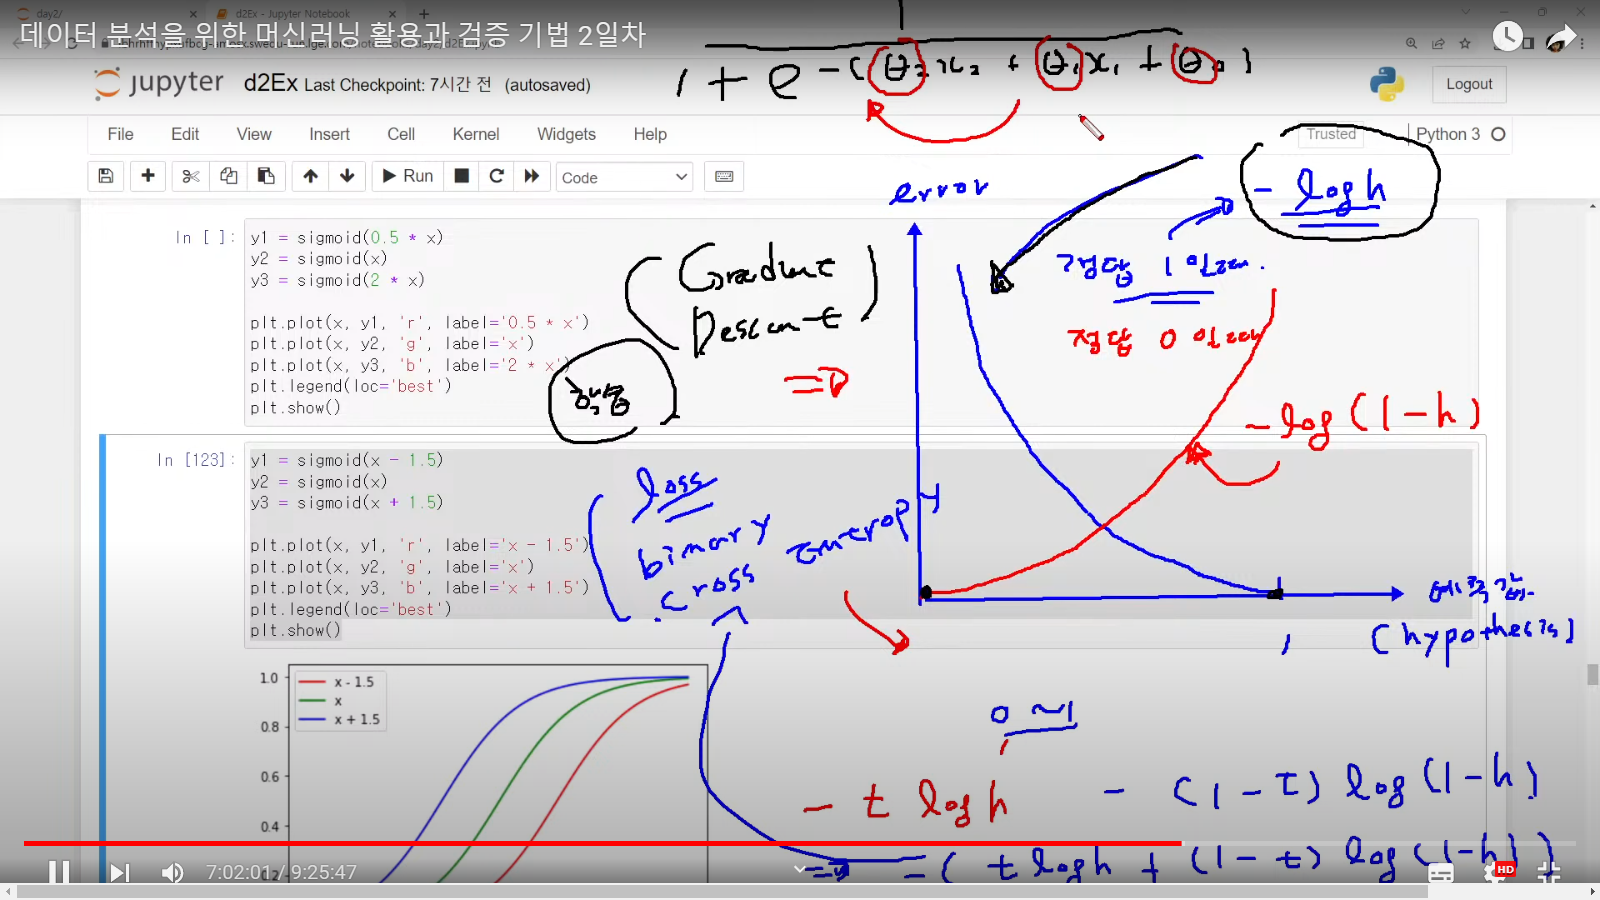

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

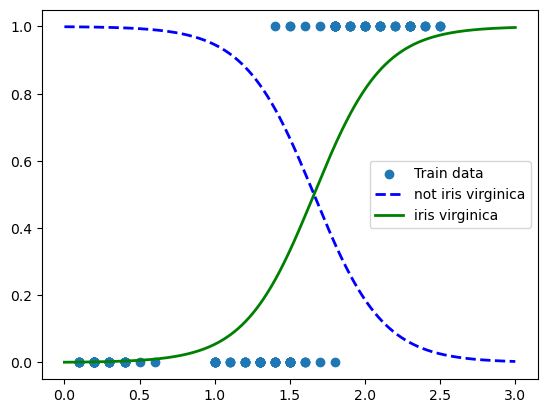

In [135]:
iris = load_iris()

x = iris['data'][:, -1:] # iris 데이터의 마지막 컬럼만 x 데이터로 함
y = (iris['target']==2).astype(int) # iris 데이터는 3가지로 label 되어 있으나, 본 예제에서는 iris type이 2(virginica)냐 아니냐의 2진 분류 문제로 하기 위함

log_reg = LogisticRegression()
log_reg.fit(x, y)

x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(x_new)
plt.scatter(x, y, label='Train data')
plt.plot(x_new, y_prob[:, 0], 'b--', linewidth=2, label='not iris virginica')
plt.plot(x_new, y_prob[:, 1], 'g-', linewidth=2, label='iris virginica')
plt.legend()
plt.show()

### 분류값이 3개 이상일 경우의 Logistic Regression Model

In [193]:
x = iris['data'][:, (2, 3)] # iris 데이터 중 2가지의 특성값을 사용
y = iris['target'] # target 값은 3가지로 분류되어 있음

m_reg = LogisticRegression(multi_class='multinomial') # 3가지 이상으로 분류할 때 'multinomial' 로 모델 생성
m_reg.fit(x, y) # 모델 학습

x0, x1 = np.meshgrid(                             # iris의 각 특성치의 범위에 해당하는 모든 경우의 수의 값을 예측해보기 위해 np.meshgrid 사용
    np.linspace(0, 8, 500).reshape(-1, 1),        # 첫번째 특성치는 0~8 범위인데 이걸 500개 정도로 만들어봄
    np.linspace(0, 3.5, 200).reshape(-1, 1),      # 두번째 특성치는 0~3.5 범위인데 이걸 200개 정도로 만들어봄 
)                                                 # 2가지 특성치 전체 조합의 개수는 100,000개임

x_news = np.c_[x0.ravel(), x1.ravel()]            # 각 특성치를 1차원데이터로 만들고 이걸 학습데이터 형식에 맞게 2개열의 데이터로 만듬

y_predict = m_reg.predict(x_news) 
y_predict[400:600]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])